In [1]:
from io import BytesIO
import PIL
import matplotlib.pylab as plt
import os
import numpy as np
import time
from IPython.display import display, Image, clear_output

from scipy.misc import imresize

In [2]:
image_corpus = {}
image_directory = '../../data/class_prerenders/'

for filename in os.listdir(image_directory):
    if not filename.startswith('.'):
        print(filename)
        imgs_collection = []
        class_directory = filename
        class_directory_path = os.path.join(image_directory,filename)
        for img_file in os.listdir(class_directory_path):
            if not img_file.startswith('.'):
                img = plt.imread(os.path.join(class_directory_path,img_file))
                imgs_collection.append(img)
        image_corpus[class_directory] = imgs_collection

air_conditioner
car_horn
children_playing
dog_bark
drilling
engine_idling
gun_shot
jack_hammer
siren
street_music


In [3]:
def streamarray(a, fmt='jpeg'):
    clear_output(wait=True)
    a = np.uint8(np.clip(a, 0, 255))
    d_buffer = BytesIO()
    PIL.Image.fromarray(a).save(d_buffer, fmt)
    display(Image(data=d_buffer.getvalue()))
    d_buffer.close()
    time.sleep(.08) # 10 seconds, this a comfortable zoom pace
    
    
def query_prediction_file(prediction_file='../../data/preds_file.txt'):
    
    f2 = open(prediction_file, "rt")
    line = f2.read()
    return line


def stream_classified_sounds():
    # Eventually you'll pass the target label
    # include dictonary to img collection
    while True:
        
        try:
            
            label = query_prediction_file()
            
            for idx in range(0,40):
                img = image_corpus[label][idx]
                img = imresize(img,(500,500))
                streamarray(img)
                
            label = query_prediction_file()
            
            #img = (img * .35) + (image_corpus[label][2] * .65)
            #streamarray(img)

        except KeyboardInterrupt:

            break
        

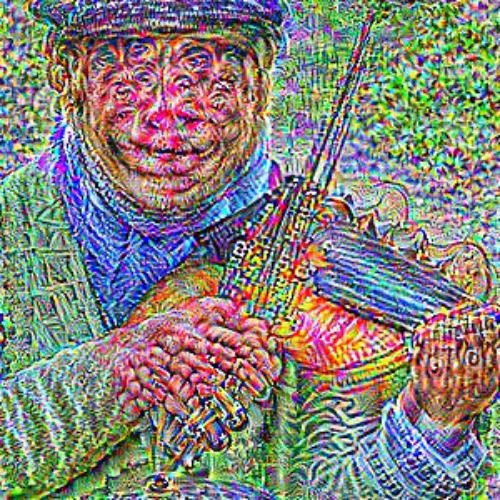

In [5]:
stream_classified_sounds()